<a href="https://colab.research.google.com/github/sdiaz8/sdiaz8/blob/main/Annualized%20Returns%2C%20Efficient%20Frontier%20and%20Sharpe%20Ratio%20using%20PyPortfolioOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-3
Due date Oct. 10

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. 

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

1. Annualized the daily return and standard deviation for each respective stock

In [ ]:
#Install and Import packages
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Install PyPortfolioOpt and Import Libraries
!pip install PyPortfolioOpt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting, CLA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Retrieving Stocks data, Eliminating columns except closing price
stocks = ['AAPL', 'AMZN', 'MMM', 'XOM']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')
stock_price = stock_price['Close']
stock_price.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04 00:00:00-05:00,129.410004,159.331497,171.869995,41.500000
2021-01-05 00:00:00-05:00,131.009995,160.925507,171.580002,43.500000
2021-01-06 00:00:00-05:00,126.599998,156.919006,174.190002,44.610001
2021-01-07 00:00:00-05:00,130.919998,158.108002,169.720001,44.959999
2021-01-08 00:00:00-05:00,132.050003,159.134995,166.619995,45.459999


In [ ]:
#Daily Return for each Stock
returns = np.log(stock_price/stock_price.shift(1))
returns.dropna(inplace=True)
returns

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-05 00:00:00-05:00,0.012288,0.009955,-0.001689,0.047068
2021-01-06 00:00:00-05:00,-0.034241,-0.025212,0.015097,0.025197
2021-01-07 00:00:00-05:00,0.033554,0.007549,-0.025997,0.007815
2021-01-08 00:00:00-05:00,0.008594,0.006475,-0.018434,0.011060
2021-01-11 00:00:00-05:00,-0.023523,-0.021754,-0.008559,0.029905
...,...,...,...,...
2021-12-27 00:00:00-05:00,0.022715,-0.008212,0.009839,0.014157
2021-12-28 00:00:00-05:00,-0.005784,0.005827,0.005306,-0.003237
2021-12-29 00:00:00-05:00,0.000502,-0.008592,0.004325,-0.008792


In [ ]:
#Annualized Returns
returns.mean() * 252

AAPL    0.317640
AMZN    0.045491
MMM     0.033096
XOM     0.389837
dtype: float64

In [ ]:
#Annualized Returns Covariance
returns.cov() * np.sqrt(252)

,AAPL,AMZN,MMM,XOM
AAPL,0.003940,0.002238,0.000377,0.000285
AMZN,0.002238,0.003660,-0.000096,0.000326
MMM,0.000377,-0.000096,0.002210,0.000966
XOM,0.000285,0.000326,0.000966,0.005589


In [ ]:
#Finding the Standard Deviation for Respective Stocks
stock_price.describe()

,AAPL,AMZN,MMM,XOM
count,252.000000,252.000000,252.000000,252.000000
mean,140.989365,167.193349,187.698810,57.963651
std,14.659580,8.002098,11.129615,5.017095
min,116.360001,147.597504,165.199997,41.500000
25%,128.962498,161.681870,177.760002,55.545001
50%,141.305000,167.061501,185.404999,58.830000
75%,148.962505,172.418747,198.272503,61.565001
max,180.330002,186.570496,207.330002,66.360001


2. Draw efficient frontier

In [ ]:
#Setting up the instantiated optimizer
mu = expected_returns.capm_return(stock_price)
S = risk_models.CovarianceShrinkage(stock_price).ledoit_wolf()
cla = CLA (mu, S)

In [ ]:
#showing mu (expected return for each stock)
mu

AAPL    0.275943
AMZN    0.248243
MMM     0.149021
XOM     0.288009
Name: mkt, dtype: float64

In [ ]:
#Covariance Matrix for each stock
S

,AAPL,AMZN,MMM,XOM
AAPL,0.062227,0.032427,0.005449,0.003961
AMZN,0.032427,0.057843,-0.001440,0.004519
MMM,0.005449,-0.001440,0.037070,0.013888
XOM,0.003961,0.004519,0.013888,0.086363


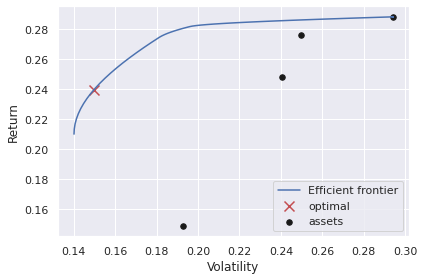

In [ ]:
#Efficient Frontier Plot
ax = plotting.plot_efficient_frontier(cla)
ax

The only stock that is on the the inefficient part of the frontier is 3M, the stock with the highest return and risk is Exxon, followed by Apple and Amazon.

3. Assume risk free rate to be 0.01

In [ ]:
#Assigning the risk free rate to .01
risk_free = .01
risk_free

0.01

4. Calculate the sharpe ratio and interpret which one is the best

In [ ]:
#Creating a cumulative sum column
stock_price["Total Pos"] = stock_price.sum(axis=1)
stock_price.head()

,AAPL,AMZN,MMM,XOM,Total Pos
Date,,,,,
2021-01-04 00:00:00-05:00,129.410004,159.331497,171.869995,41.500000,1004.222992
2021-01-05 00:00:00-05:00,131.009995,160.925507,171.580002,43.500000,1014.031006
2021-01-06 00:00:00-05:00,126.599998,156.919006,174.190002,44.610001,1004.638016
2021-01-07 00:00:00-05:00,130.919998,158.108002,169.720001,44.959999,1007.416000
2021-01-08 00:00:00-05:00,132.050003,159.134995,166.619995,45.459999,1006.529984


In [ ]:
#Daily Returns for the cumulative sum
stock_price["Daily Return"] = np.log(stock_price['Total Pos']/stock_price['Total Pos'].shift(1))
stock_price.dropna(inplace=True)
stock_price.head()

,AAPL,AMZN,MMM,XOM,Total Pos,Daily Return
Date,,,,,,
2021-01-05 00:00:00-05:00,131.009995,160.925507,171.580002,43.500000,1014.031006,0.009719
2021-01-06 00:00:00-05:00,126.599998,156.919006,174.190002,44.610001,1004.638016,-0.009306
2021-01-07 00:00:00-05:00,130.919998,158.108002,169.720001,44.959999,1007.416000,0.002761
2021-01-08 00:00:00-05:00,132.050003,159.134995,166.619995,45.459999,1006.529984,-0.000880
2021-01-11 00:00:00-05:00,128.979996,155.710495,165.199997,46.840000,993.460976,-0.013069


In [ ]:
#Sharpe Ratio
Sharpe_Ratio = stock_price["Daily Return"].mean() / stock_price["Daily Return"].std()
Sharpe_Ratio

0.0635200972979645

In [ ]:
#Annualized Sharpe Ratio
Annualized_Sharpe = Sharpe_Ratio * np.sqrt(252)
Annualized_Sharpe

1.0083502842302396

From the above portfolio, the Sharpe ratio is 1.008, which means this is an acceptable portfolio since the Sharpe ratio is close to 1.

In [ ]:
#Using PyPortfolioOpt to find Returns, Volatility and Sharpe Ratio
ef = EfficientFrontier (mu, S, weight_bounds = (0,1))
ef.min_volatility()
weights_min_volatility = ef.clean_weights()
print(ef.portfolio_performance(verbose=True, risk_free_rate=.01))

Expected annual return: 21.0%
Annual volatility: 14.0%
Sharpe Ratio: 1.43
(0.2100104190894438, 0.14014180700658713, 1.427200229265223)


Using PyPortfolioOpt, the Sharpe ratio is 1.4272 which means this portfolio is a good investment since the Sharpe ratio is above 1.

#Sources:
https://www.youtube.com/watch?v=5BaBZo_81ic&t=510s, 
Portfolio Theory and Its Application in Python.ipynb,
https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805